In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
! pip install tensorflow

In [8]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install os
!pip install math

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math


In [9]:
import os

In [13]:
import math

In [15]:
from math import ceil
from PIL import Image

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [17]:
from skimage import io
from skimage import color
from skimage.transform import rescale, resize, downscale_local_mean


In [18]:
import pickle

In [19]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.applications.vgg16 import VGG16

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# function to load folder into arrays and  then it returns that same array

def load_files(path):
    # Put files into lists and return them as one list of size 4
    image_files = os.listdir(path)
    image_files = [path + x for x in image_files]
    return image_files

In [36]:
# feeding images into numpy ndarray

def load_array(image_files, min_size):
    X = np.array([])
    for file in image_files:
        try:
            img = io.imread(file)
            img_resized = resize(img, (min_size,min_size), anti_aliasing=True)
            if X.shape[0] == 0:
                X = np.array([img_resized])
            else:
                X = np.append(X, [img_resized], axis = 0)
        except:
            print("image error: ", file)
    return X



In [21]:
# For reproducibility
np.random.seed(42)

In [24]:
BATCH_SIZE = 64
IMG_SIZE = (400, 400)

# Create the base model from the pre-trained model VGG16
IMG_SHAPE = IMG_SIZE + (3,)
input_model = VGG16(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

In [26]:
input_model.trainable=False

In [27]:
# add new classifier layers
flat1 = Flatten()(input_model.layers[-1].output)
class1 = Dense(128, activation='relu')(flat1)
output = Dense(1, activation='sigmoid')(class1)
# define new model
model = Model(inputs=input_model.inputs, outputs=output)

In [30]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 400, 400, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 400, 400, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 400, 400, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 200, 200, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 200, 200, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 200, 200, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 100, 100, 128)     0     

In [43]:
# Colab path
path = '/content/drive/MyDrive/Capstone'
image_path = path + '/images/old_samples/'
image_path2 = path + "/images/old_interior/"

# Photos of old or period buildings
image_files = load_files(image_path)

# second batch of old buildings - 150 images of interior
image_files2 = load_files(image_path2)

# concatenating 2 lists
image_files = image_files + image_files2

# set min_size = 400
min_size = 400

print(f"number of image_files = {len(image_files)}")
print(f"min_size = {min_size}")

number of image_files = 250
min_size = 400


In [44]:
# record the path of image files
df_file_info = pd.DataFrame(image_files)
df_file_info.columns = ["image_link"]
print(f"df_file_info = {df_file_info.head(5)}")

df_file_info =                                           image_link
0  /content/drive/MyDrive/Capstone/images/old_sam...
1  /content/drive/MyDrive/Capstone/images/old_sam...
2  /content/drive/MyDrive/Capstone/images/old_sam...
3  /content/drive/MyDrive/Capstone/images/old_sam...
4  /content/drive/MyDrive/Capstone/images/old_sam...


In [37]:
X_old = load_array(image_files, min_size)

# y value is zero for old buildings
y_old = np.zeros((len(image_files),1))

print(f"X_old shape = {X_old.shape}")
print(f"y_old shape = {y_old.shape}")

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


X_old shape = (250, 400, 400, 3)
y_old shape = (250, 1)


In [45]:
df_y_old = pd.DataFrame(y_old, columns=["label"])
df_y_old["image_link"] = df_file_info["image_link"]
print(df_y_old.shape)

(250, 2)


In [38]:
# Photos of modern buildings

# Colab path
path = '/content/drive/MyDrive/Capstone'
image_path = path + '/images/modern_samples/'
image_path2 = path + "/images/modern_exterior/"

image_files = load_files(image_path)

# second batch of old buildings - 150 images of interior
image_files2 = load_files(image_path2)

# concatenating 2 lists
image_files = image_files + image_files2

# set min_size = 400
min_size = 400

print(f"number of image_files = {len(image_files)}")
print(f"min_size = {min_size}")

number of image_files = 250
min_size = 400


In [39]:
# record the path of image files
df_file_info = pd.DataFrame(image_files)
df_file_info.columns = ["image_link"]
print(f"df_file_info = {df_file_info.head(5)}")

df_file_info =                                           image_link
0  /content/drive/MyDrive/Capstone/images/modern_...
1  /content/drive/MyDrive/Capstone/images/modern_...
2  /content/drive/MyDrive/Capstone/images/modern_...
3  /content/drive/MyDrive/Capstone/images/modern_...
4  /content/drive/MyDrive/Capstone/images/modern_...


In [40]:
X_modern = load_array(image_files, min_size)

# y value is one for modern buildings
y_modern = np.ones((len(image_files),1))

print(f"X_modern shape = {X_modern.shape}")
print(f"y_modern shape = {y_modern.shape}")

X_modern shape = (250, 400, 400, 3)
y_modern shape = (250, 1)


In [41]:
df_y_modern = pd.DataFrame(y_modern, columns=["label"])
df_y_modern["image_link"] = df_file_info["image_link"]
print(df_y_modern.shape)
X = np.append(X_old, X_modern, axis = 0)
X.shape

(250, 2)


(500, 400, 400, 3)

In [46]:
df_y = pd.concat([df_y_old, df_y_modern])
df_y.reset_index(drop=True, inplace=True)
df_y["id"] = df_y.index
print(df_y.shape)
df_y.tail(10)

(500, 3)


,label,image_link,id
490,1.0,/content/drive/MyDrive/Capstone/images/modern_...,490
491,1.0,/content/drive/MyDrive/Capstone/images/modern_...,491
492,1.0,/content/drive/MyDrive/Capstone/images/modern_...,492
493,1.0,/content/drive/MyDrive/Capstone/images/modern_...,493
494,1.0,/content/drive/MyDrive/Capstone/images/modern_...,494
495,1.0,/content/drive/MyDrive/Capstone/images/modern_...,495
496,1.0,/content/drive/MyDrive/Capstone/images/modern_...,496
497,1.0,/content/drive/MyDrive/Capstone/images/modern_...,497
498,1.0,/content/drive/MyDrive/Capstone/images/modern_...,498
499,1.0,/content/drive/MyDrive/Capstone/images/modern_...,499


In [47]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, df_y, stratify=df_y["label"])
print(y_train.shape)

(375, 3)


In [48]:
# Baseline accuracy - 50%
y_train['label'].value_counts()

1.0    188
0.0    187
Name: label, dtype: int64

In [50]:
y_test.shape

(125, 3)

In [52]:
y_test['id'][:10]

369    369
63      63
286    286
446    446
130    130
496    496
179    179
48      48
87      87
210    210
Name: id, dtype: int64

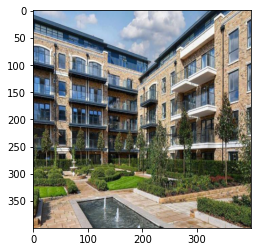

In [54]:
plt.imshow(X_train[0])

In [55]:
# Standard Scaler - skipped
X_train_ss = X_train
X_test_ss = X_test

In [56]:
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
# Fit model on training data
history = model.fit(X_train_ss,
                        y_train['label'],
                        batch_size=32,
                        validation_data=(X_test_ss, y_test['label']),
                        epochs=30,
                        verbose=1)

Epoch 1/30
12/12 [==============================] - 800s 68s/step - loss: 3.5856 - accuracy: 0.5684 - val_loss: 1.6331 - val_accuracy: 0.5840
Epoch 2/30
12/12 [==============================] - 802s 68s/step - loss: 0.5224 - accuracy: 0.8426 - val_loss: 0.8522 - val_accuracy: 0.7680
Epoch 3/30
12/12 [==============================] - 802s 68s/step - loss: 0.2836 - accuracy: 0.8992 - val_loss: 1.9009 - val_accuracy: 0.7280
Epoch 4/30
12/12 [==============================] - 794s 68s/step - loss: 0.3163 - accuracy: 0.8711 - val_loss: 1.0434 - val_accuracy: 0.7680
Epoch 5/30
12/12 [==============================] - 805s 68s/step - loss: 0.0682 - accuracy: 0.9749 - val_loss: 0.9976 - val_accuracy: 0.7840
Epoch 6/30
12/12 [==============================] - 887s 76s/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.7427 - val_accuracy: 0.8000
Epoch 7/30
12/12 [==============================] - 828s 71s/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.7028 - val_accuracy: 0.8160
Epoch 